<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reconocimiento-de-dígitos-(MNIST-dataset)-con-Keras/Tensorflow" data-toc-modified-id="Reconocimiento-de-dígitos-(MNIST-dataset)-con-Keras/Tensorflow-1">Reconocimiento de dígitos (MNIST <em>dataset</em>) con Keras/Tensorflow</a></span><ul class="toc-item"><li><span><a href="#dataset:-MNIST-handwritten-digit-dataset" data-toc-modified-id="dataset:-MNIST-handwritten-digit-dataset-1.1"><em>dataset</em>: MNIST <em>handwritten digit dataset</em></a></span></li><li><span><a href="#0.-Importación-de-librerías" data-toc-modified-id="0.-Importación-de-librerías-1.2">0. Importación de librerías</a></span></li><li><span><a href="#1.-Precarga-del-dataset-(keras)" data-toc-modified-id="1.-Precarga-del-dataset-(keras)-1.3">1. Precarga del <em>dataset</em> (keras)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#--datasets-info:" data-toc-modified-id="--datasets-info:-1.3.0.1">- <em>datasets info</em>:</a></span></li><li><span><a href="#--sample:" data-toc-modified-id="--sample:-1.3.0.2">- <em>sample</em>:</a></span></li></ul></li></ul></li><li><span><a href="#2.-Preprocesado-del-dataset-(normalización,-redimensionado)" data-toc-modified-id="2.-Preprocesado-del-dataset-(normalización,-redimensionado)-1.4">2. Preprocesado del <em>dataset</em> (normalización, redimensionado)</a></span><ul class="toc-item"><li><span><a href="#2.1.-Normalización-y-redimensionado-de-las-imágenes" data-toc-modified-id="2.1.-Normalización-y-redimensionado-de-las-imágenes-1.4.1">2.1. Normalización y redimensionado de las imágenes</a></span></li><li><span><a href="#2.2.-Codificación-one-hot-de-las-etiquetas" data-toc-modified-id="2.2.-Codificación-one-hot-de-las-etiquetas-1.4.2">2.2. Codificación <em>one-hot</em> de las etiquetas</a></span></li></ul></li><li><span><a href="#3.-Creación-del-modelo" data-toc-modified-id="3.-Creación-del-modelo-1.5">3. Creación del modelo</a></span><ul class="toc-item"><li><span><a href="#3.1.-Visualizando-las-neuronas-(pre-training)" data-toc-modified-id="3.1.-Visualizando-las-neuronas-(pre-training)-1.5.1">3.1. Visualizando las neuronas (pre-training)</a></span></li></ul></li><li><span><a href="#4.-Compilación-del-modelo" data-toc-modified-id="4.-Compilación-del-modelo-1.6">4. Compilación del modelo</a></span></li><li><span><a href="#5.-Entrenamiento-del-modelo" data-toc-modified-id="5.-Entrenamiento-del-modelo-1.7">5. Entrenamiento del modelo</a></span><ul class="toc-item"><li><span><a href="#5.1.-Visualizando-las-neuronas-(post-training)" data-toc-modified-id="5.1.-Visualizando-las-neuronas-(post-training)-1.7.1">5.1. Visualizando las neuronas (post-training)</a></span></li></ul></li><li><span><a href="#6.-Evaluación-del-modelo" data-toc-modified-id="6.-Evaluación-del-modelo-1.8">6. Evaluación del modelo</a></span><ul class="toc-item"><li><span><a href="#6.1.-Análisis-de-resultados-(confusion-matrix)" data-toc-modified-id="6.1.-Análisis-de-resultados-(confusion-matrix)-1.8.1">6.1. Análisis de resultados (<em>confusion matrix</em>)</a></span></li></ul></li><li><span><a href="#7.-Haciendo-predicciones" data-toc-modified-id="7.-Haciendo-predicciones-1.9">7. Haciendo predicciones</a></span></li></ul></li></ul></div>

## Reconocimiento de dígitos (MNIST _dataset_) con Keras/Tensorflow

### _dataset_: MNIST _handwritten digit dataset_
---

Es una colección de imágenes de dígitos escritos a mano usada para el entrenamiento y testeo de sistemas y algoritmos de procesado de imágenes, especialmente en el campo de aprendizaje automático.

<br>Consta de **70.000** imágenes (60.000 en el _training dataset_ y 10.000 en el _test dataset_) de **28x28** píxels en **escala de grises** con un valor entre **\[0, 255]**

<br><img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="600"/>

### 0. Importación de librerías
---

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# versión de tensorflow
print(f"tensorflow version: {tf.__version__}")

# soporte de GPU
gpu_list = tf.config.list_physical_devices('GPU')
print(f"tensorflow GPU support: {'yes' if len(gpu_list) else 'no'}")
for i,gpu in enumerate(gpu_list):
    print(f"\t[{i}] - name: {gpu[0]}")

tensorflow version: 2.7.0
tensorflow GPU support: yes
	[0] - name: /physical_device:GPU:0


### 1. Precarga del _dataset_ (keras)
---

In [2]:
mnist = tf.keras.datasets.mnist

# creación de los datasets de entrenamiento y test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##### - _datasets info_:

In [3]:
print(f"x_train: {x_train.dtype} {x_train.shape}")
print(f"y_train [labels]: {y_train.dtype} {y_train.shape}")
print(f"x_test: {x_test.dtype} {x_test.shape}")
print(f"y_test [labels]: {y_test.dtype} {y_test.shape}")

x_train: uint8 (60000, 28, 28)
y_train [labels]: uint8 (60000,)
x_test: uint8 (10000, 28, 28)
y_test [labels]: uint8 (10000,)


##### - _sample_:

In [4]:
def show_image(data, label, labels=None):
    """Muestra la imagen seleccionada del training dataset."""
    # label
    print(f"Label: {label} {'(' + labels[label] + ')' if labels else ''}")

    # image
    print("\nImage:", end="")
    plt.figure(figsize=(3,3))
    plt.imshow(data, cmap=plt.cm.binary)
    plt.show()
    
    # data matrix
    print("\nData:")
    for i in range(len(data)):
        for j in range(len(data[0])):
            print(f"{data[i,j]:^5d}", end=" ")
        print()

Label: 5 

Image:

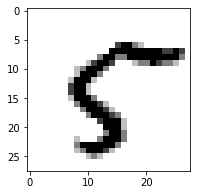


Data:
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0 

In [5]:
i = random.randint(0, len(x_train)-1)
show_image(x_train[i], y_train[i])

### 2. Preprocesado del _dataset_ (normalización, redimensionado)
---

#### 2.1. Normalización y redimensionado de las imágenes
---

In [6]:
# Normalizamos los valores de las imágenes al rango [0, 1]
xn_train = x_train.astype('float32')/255
xn_test = x_test.astype('float32')/255

# Redimensionado (aplanamiento 1D de las imágenes)
xn_train = xn_train.reshape(60000, 28*28)
xn_test = xn_test.reshape(10000, 28*28)

print(f"xn_train: {xn_train.dtype} {xn_train.shape}")
print(f"xn_test: {xn_test.dtype} {xn_test.shape}")

xn_train: float32 (60000, 784)
xn_test: float32 (10000, 784)


#### 2.2. Codificación _one-hot_ de las etiquetas
---

In [7]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding a 10 clases (1 por cada posible dígito)
yn_train = to_categorical(y_train, num_classes=10)
yn_test = to_categorical(y_test, num_classes=10)

print(f"yn_train [labels]: {y_train.dtype} {y_train.shape}")
print(f"yn_test [labels]: {y_test.dtype} {y_test.shape}")

yn_train [labels]: uint8 (60000,)
yn_test [labels]: uint8 (10000,)


In [8]:
# sample
i = random.randint(0, len(y_train)-1)
print(f"label: {y_train[i]} --> one-hot: {yn_train[i]}")

label: 3 --> one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### 3. Creación del modelo
---

El modelo **fully-connected** constará de las siguientes capas/neuronas:


<br>- **Input Layer:** 784 units

<br>- **Hidden Layer:** 10 units (input: 784 output: 10) con activación **sigmoid**

<br>- **Output Layer:** 10 units (input: 10, output: 10) con activación **softmax**

<br><img src="https://torres.ai/wp-content/uploads/2020/05/MNIST-deep-learning-example.png"/>


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Modelo
model = Sequential(name="MNIST_model")
model.add(Dense(10, activation="sigmoid", input_shape=(784,), name="hidden"))
model.add(Dense(10, activation="softmax", name="output"))

# Descripción del modelo
model.summary()

Model: "MNIST_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 10)                7850      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


#### 3.1. Visualizando las neuronas (pre-training)
---

In [10]:
def show_neurons(model, layer, units, unit_size, fig_dim, fig_size):
    _INPUT_PARAMS = 0

    rows, cols = fig_dim
    fig,ax = plt.subplots(rows, cols, figsize=fig_size)

    for unit in range(units):
        layer_input_weights = model.layers[layer].get_weights()[_INPUT_PARAMS]
        unit_w = layer_input_weights[:, unit]
        ax[unit // cols, unit % cols].imshow(np.reshape(unit_w, (-1,unit_size)), cmap=plt.cm.binary)
        ax[unit // cols, unit % cols].set_xlabel(f'neuron-{unit:02}')

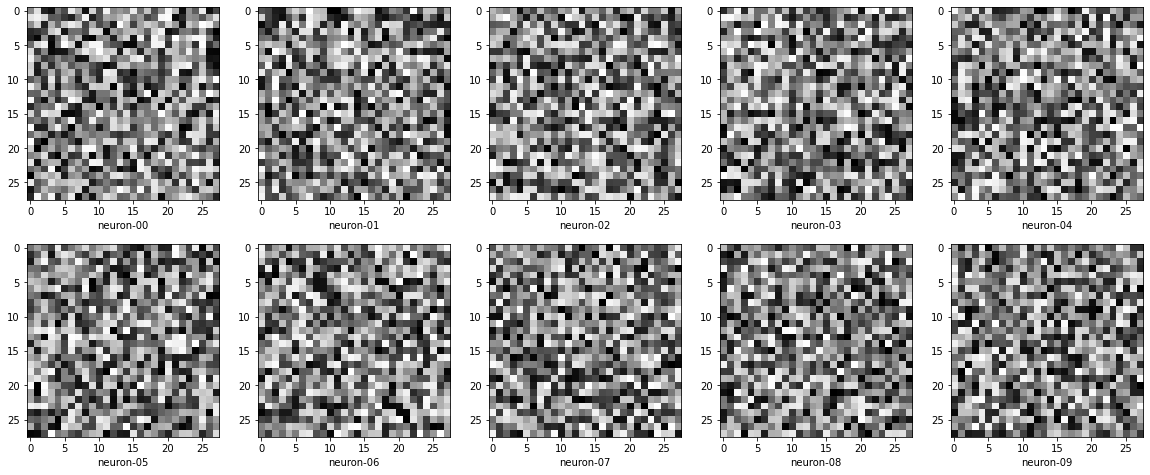

In [11]:
show_neurons(model, layer=0, units=10, unit_size=28, fig_dim=(2,5), fig_size=(20,8))

### 4. Compilación del modelo
---

Una vez creado el modelo, debemos configurar el proceso de aprendizaje. Es decir, la **función de coste** (_loss function_) que determina el error de la predicción, el **optimizador** que se empleará para la actualización de los parámetros y la **métrica** empleada para monitorizar el proceso de aprendizaje:

<br>- **loss**: categorical_crossentropy (clasificador multicapa)

<br>- **optimizer**: sgd (Stochastic Gradient Descent)

<br>- **metrics**: accuracy (ratio de positivos verdaderos)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 5. Entrenamiento del modelo
---

Una vez descrito y compilado el modelo, iniciaremos el entrenamiento mediante el cual la red determinará el valor correspondiente a los diferentes parámetros (**_pesos_**) de entrada de las neuronas. 

<br>Para ello, le suministraremos los datos de entrenamiento que, al tratarse de **aprendizaje supervisado**, incluirán tanto las imágenes del **_training dataset_** como la lista de etiquetas correspondientes a cada imagen (**_yn\_train_**).

<br>Además, indicaremos el número de **_epochs_** o "pasadas" que se harán sobre el conjunto de datos durante el entrenamiento. Básicamente, en cada una de estas iteraciones, se "pasarán" las imágenes de entrenamiento por la red, se obtendrá el resultado correspondiente, se comparará con el valor esperado y, en un proceso "hacia atrás" (_back propagation_) se calculará el **_loss_** (error) en cada neurona y se ajustarán sus parámetros convenientemente mediante el **_optimizer_** seleccionado de forma que se vaya reduciendo el error en cada iteración.

In [13]:
model.fit(xn_train, yn_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8680 - accuracy: 0.5167
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2501 - accuracy: 0.7527
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9158 - accuracy: 0.8098
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7401 - accuracy: 0.8385
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6354 - accuracy: 0.8569
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5659 - accuracy: 0.8702
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5167 - accuracy: 0.8789
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4802 - accuracy: 0.8855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4524 - accuracy: 0.8902
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.430

#### 5.1. Visualizando las neuronas (post-training)
---

In [ ]:
print("Layer-0 (hidden):")
show_neurons(model, layer=0, units=10, unit_size=28, fig_dim=(2,5), fig_size=(20,8))

print("Layer-1 (output):")
show_neurons(model, layer=1, units=10, unit_size=10, fig_dim=(2,5), fig_size=(25,3))

### 6. Evaluación del modelo
---

Para evaluar el modelo se emplea el _testing dataset_ que se separó inicialmente del _dataset_ original por lo que el modelo no "vio" durante el entrenamiento

In [ ]:
test_loss, test_acc = model.evaluate(xn_test, yn_test)

print(f"Precisión: {test_acc*100.0:.2f}%")

#### 6.1. Análisis de resultados (_confusion matrix_)
---

Para un clasificador binario, se establece la matriz de confusión como:

<br>

| | Actual: YES | Actual: NO |
|--- | --- | --- |
| **Predicted: YES** | True Positive | False Positive |
| **Predicted: NO** | False Negative | True Negative |

<br>- **True Positive (TP)**: número de muestras positivas clasificadas **correctamente**

<br>- **True Negative (TN)**: número de muestras negativas clasificadas **correctamente**

<br>- **False Negative (FN)**: número de muestras positivas clasificadas **incorrectamente** como negativas

<br>- **False Positive (TN)**: número de muestras negativas clasificadas **incorrectamente** como positivas

<br>A partir de esta matriz, podemos calcular la **precisión** (_accuracy_) como **aciertos/total**:

<br>$Precision = \frac{TP + TN}{TP + FP + TN + FN}$

<br>Sin embargo, en determinadas problemas, emplear sólo la precisión no es un buen indicador pues no distinguimos entre errores de falsos positivos y falsos negativos (por ejemplo, clasificación de setas venenosas o tumores cancerígenos). Así, otro indicador denominado **recall**, nos indica cómo de bien nuestro modelo evita los **falsos negativos**

<br>$Recall = \frac{TP}{TP + FN} = \frac{True Positives}{Total Positives}$

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(xn_test)
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
img = ConfusionMatrixDisplay(confusion_matrix=cm)
img.plot()
plt.title("Confusion Matrix")
plt.show()

### 7. Haciendo predicciones
---

Vamos a selecciona aleatoriamente una imagen del conjunto de prueba y ver qué predice el modelo:

In [ ]:
i = random.randint(0, len(x_test)-1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
#prediction = model.predict(np.array([xn_test[i]]))
probs = model.predict(np.expand_dims(xn_test[i], axis=0))
print(f"Predicted Label: {np.argmax(probs)}")
print(f"Actual Label: {y_test[i]}")
print(f"Confidence:")
for i, p in enumerate(probs[0]):
    print(f"\t{i}: {p*100:.2f}%")